<a href="https://colab.research.google.com/github/sipocz/I4_0/blob/main/I4_0_isomap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.manifold import Isomap



In [4]:
!wget "https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py"
!rm grafikon.py.*
from grafikon import grafikon

--2024-05-06 18:59:30--  https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5254 (5.1K) [text/plain]
Saving to: ‘grafikon.py’

grafikon.py         100%[===================>]   5.13K  --.-KB/s    in 0s      

2024-05-06 18:59:30 (48.8 MB/s) - ‘grafikon.py’ saved [5254/5254]

rm: cannot remove 'grafikon.py.*': No such file or directory


In [5]:
drive.mount('/content/drive', readonly=True,force_remount=True )

Mounted at /content/drive


In [6]:
user = "SL"

In [7]:

if user=="NKF":
    path = "/content/drive/MyDrive/*"
else:
    path = "/content/drive/MyDrive/adatok_szakdoga/adatok_20210201_20240101/df_osszes.csv"

In [8]:
df_osszes=pd.read_csv(path,)

In [9]:
df_osszes["Timestamp"]=pd.to_datetime(df_osszes["Timestamp"], format="%Y-%m-%d %H:%M:%S")

In [10]:
df_osszes.set_index("Timestamp",inplace=True)

In [11]:
del(df_osszes["Unnamed: 0"] )

In [12]:
df_osszes["Szum_metanol"]=df_osszes["Meleg_tartaly_szint"]+df_osszes["Hideg_tartaly_szint"]

In [ ]:
#df_osszes=df_osszes.astype(int)

In [13]:
df_mini_orig = df_osszes.filter(['Szum_metanol','Szteroid2_uni_rhv_hom','Szteroid2_2_rhv_hom','Szteroid2_krom_rhv_hom','Szteroid_sp_rhv_hom','Szteroid_nor12_rhv_hom','Szteroid_thf1_rhv_hom','Szteroid_thf2_rhv_hom','Szteroid_merk_rhv_hom','Szintetikus3_1_rhv_hom','Szintetikus3_2_rhv_hom','Szintetikus3_3_rhv_hom','Szintetikus3_4_rhv_hom','Szintetikus3_hidr_rhv_hom','Szintetikus1_1_rhv_hom','Szintetikus1_2_rhv_hom','Szintetikus1_3_rhv_hom','Szintetikus1_4_rhv_hom','Szintetikus1_5_rhv_hom','Szintetikus1_6_rhv_hom','Oldoszer_rhv_elore_hom','Szintetikus3_rhv_elore_hom''Szter_Szter2_Tfl_rhv_elore_hom','Szintetikus1_elore_hom'], axis=1)

In [14]:
df_mini = df_osszes.filter(['Szteroid2_uni_rhv_hom','Szteroid2_2_rhv_hom','Szteroid2_krom_rhv_hom','Szteroid_sp_rhv_hom','Szteroid_nor12_rhv_hom','Szteroid_thf1_rhv_hom','Szteroid_thf2_rhv_hom','Szteroid_merk_rhv_hom','Szintetikus3_1_rhv_hom','Szintetikus3_2_rhv_hom','Szintetikus3_3_rhv_hom','Szintetikus3_4_rhv_hom','Szintetikus3_hidr_rhv_hom','Szintetikus1_1_rhv_hom','Szintetikus1_2_rhv_hom','Szintetikus1_3_rhv_hom','Szintetikus1_4_rhv_hom','Szintetikus1_5_rhv_hom','Szintetikus1_6_rhv_hom','Oldoszer_rhv_elore_hom','Szintetikus3_rhv_elore_hom''Szter_Szter2_Tfl_rhv_elore_hom','Szintetikus1_elore_hom'], axis=1)

In [15]:
df_mini.describe()

,Szteroid2_uni_rhv_hom,Szteroid2_2_rhv_hom,Szteroid2_krom_rhv_hom,Szteroid_sp_rhv_hom,Szteroid_nor12_rhv_hom,Szteroid_thf1_rhv_hom,Szteroid_thf2_rhv_hom,Szteroid_merk_rhv_hom,Szintetikus3_1_rhv_hom,Szintetikus3_2_rhv_hom,Szintetikus3_3_rhv_hom,Szintetikus3_4_rhv_hom,Szintetikus3_hidr_rhv_hom,Szintetikus1_1_rhv_hom,Szintetikus1_2_rhv_hom,Szintetikus1_3_rhv_hom,Szintetikus1_4_rhv_hom,Szintetikus1_5_rhv_hom,Szintetikus1_6_rhv_hom,Oldoszer_rhv_elore_hom
count,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06
mean,1.791602e+01,1.866796e+01,1.842537e+01,1.779770e+01,1.735590e+01,2.066038e+01,1.786041e+01,1.774129e+01,1.906506e+01,1.821369e+01,1.772424e+01,1.855604e+01,2.046158e+01,2.103953e+01,1.996895e+01,2.076945e+01,2.163324e+01,2.079118e+01,1.990206e+01,1.956564e+01
std,3.938346e+00,3.974075e+00,4.476605e+00,3.776185e+00,3.746389e+00,4.717789e+00,4.145986e+00,3.863727e+00,3.571611e+00,3.978422e+00,3.894463e+00,4.098838e+00,6.005507e+00,4.374065e+00,3.781432e+00,4.050601e+00,4.918608e+00,3.974792e+00,4.257373e+00,4.580713e+00
min,0.000000e+00,-5.000000e+01,-2.508000e+01,-2.504000e+01,-2.501000e+01,-1.900024e-01,-1.700020e-01,-5.000000e+01,0.000000e+00,-4.740108e+01,-2.511500e+01,-2.512500e+01,-5.000000e+01,-5.000000e+01,-5.000000e+01,-4.282000e+01,-5.000000e+01,-5.000000e+01,-4.500198e-02,0.000000e+00
25%,1.514000e+01,1.587500e+01,1.525000e+01,1.509000e+01,1.463499e+01,1.781000e+01,1.492001e+01,1.492499e+01,1.675000e+01,1.544943e+01,1.497500e+01,1.569500e+01,1.662500e+01,1.844247e+01,1.760008e+01,1.815500e+01,1.879000e+01,1.880000e+01,1.747500e+01,1.707154e+01
50%,1.855500e+01,1.905500e+01,1.887500e+01,1.857500e+01,1.813500e+01,2.014500e+01,1.847500e+01,1.834000e+01,1.944000e+01,1.869334e+01,1.828000e+01,1.898000e+01,1.985000e+01,2.146022e+01,2.060105e+01,2.040000e+01,2.155500e+01,2.110001e+01,2.088000e+01,2.070333e+01
75%,2.078500e+01,2.104500e+01,2.073000e+01,2.055000e+01,2.024500e+01,2.306500e+01,2.040000e+01,2.040000e+01,2.118500e+01,2.069518e+01,2.026500e+01,2.077000e+01,2.321250e+01,2.363088e+01,2.258063e+01,2.335000e+01,2.423500e+01,2.311250e+01,2.275000e+01,2.259892e+01
max,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,4.989000e+01,5.995000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,3.870854e+01


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

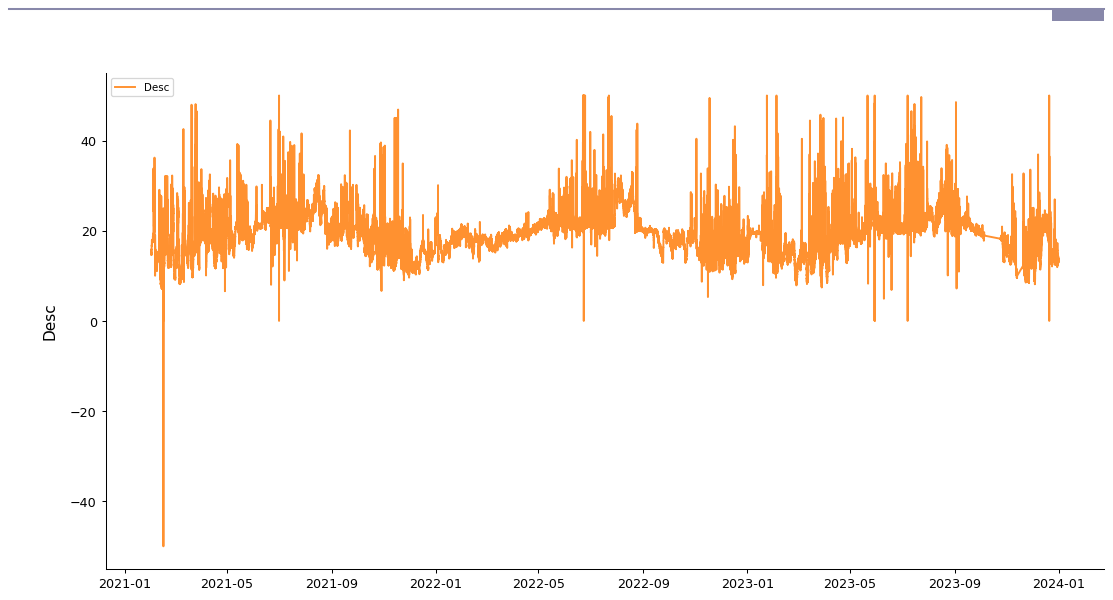

In [16]:
grafikon(df_mini,"Szteroid2_2_rhv_hom","Desc")

Isomap

In [17]:
from sklearn.manifold import Isomap

In [18]:
model=Isomap(n_components=3,)

In [ ]:
model.fit(df_mini)

In [ ]:
model.explained_variance_ratio_

array([0.6025912 , 0.11182718, 0.07594452])

In [ ]:
svd_transformed=svd.transform(df_mini)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(len(svd_transformed)/5)

306390.0


(40.0, 140.0, -20.0, 30.0)

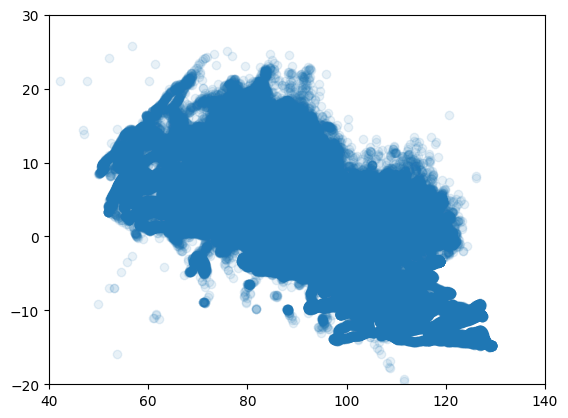

In [ ]:
plt.scatter(svd_transformed[:400000, 0], svd_transformed[:400000, 1], alpha=0.1, label="samples")
plt.axis((40,140,-20,30))

In [ ]:
plt.show()

In [ ]:
df=pd.DataFrame({'x':svd_transformed[:, 0],'y':svd_transformed[:, 1],'z':svd_transformed[:, 2]})

In [ ]:
df.head()

,x,y,z
0,71.367618,-5.108350,0.176197
1,71.317034,-5.134597,0.150292
2,71.814482,-4.622324,0.328906
3,71.872464,-4.482867,0.331387
4,71.831933,-4.557296,0.317531


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df[4000:8000], x='x', y='y', z='z',color="x")
fig.show()

In [ ]:
n_step=36
step=len(svd_transformed)/n_step
for i in range(n_step-1):
    x1=int(i*step)
    x2=int((i+1)*step)
    plt.scatter(svd_transformed[x1:x2, 0], svd_transformed[x1:x2, 1], alpha=0.01, label="samples")
    plt.axis((40,140,-20,30))
    plt.text(40,-20,df_mini.index[int(i*step)])
    plt.show()
